In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

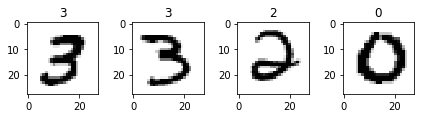

In [2]:
import matplotlib.pyplot as plt
import numpy as np
indices = [7, 16849, 1952, 283]
fig = plt.figure()
for i in range(4):
    im_idx = indices[i]
    plottable_image = np.reshape(x_train[im_idx], (28, 28))
    ax = fig.add_subplot(1, 4, i+1)
    ax.title.set_text(y_train[im_idx])
    ax.imshow(plottable_image, cmap='gray_r')
fig.tight_layout()
plt.show()

In [3]:
x_train.shape

(60000, 28, 28)

Logistic Regression

Model

In [4]:
lr_model = tf.keras.models.Sequential()
lr_model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
lr_model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Train

In [5]:
lr_model.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
lr_model.fit(x_train/255, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.7691 - acc: 0.8212
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4545 - acc: 0.8815
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.4022 - acc: 0.8921
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.3760 - acc: 0.8978
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3594 - acc: 0.9015
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3477 - acc: 0.9041
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3386 - acc: 0.9060
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3317 - acc: 0.9080
Epoch 9/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3259 - acc: 0.9099
Epoch 10/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.3210 - acc: 0.9108

In [6]:
lr_model.evaluate(x_test/255.0, y_test)

10000/10000 [==============================] - 0s 19us/step


[0.3068238961994648, 0.9154]

Convolutional Neural Network

In [7]:
input_shape = (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
cnn_model = Sequential()
cnn_model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation=tf.nn.relu))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
cnn_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
cnn_model.fit(x=x_train,y=y_train, epochs=5)
cnn_model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1739 - acc: 0.9479
Epoch 2/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0657 - acc: 0.9792
Epoch 3/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0433 - acc: 0.9859
Epoch 4/5
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0321 - acc: 0.9896
Epoch 5/5
10000/10000 [==============================] - 2s 172us/step


[0.04983124305787205, 0.9858]

2


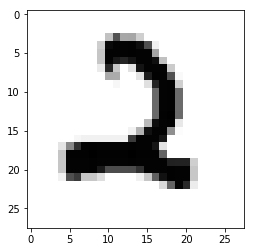

In [20]:
image_index = 1341
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = cnn_model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
plt.show()